# Pyaerocom Colocation gridded-gridded 

In [32]:
import pyaerocom as pya
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pya.change_verbosity('critical', log=pya.const.print_log) # don't output warnings
pya.__version__

'0.8.1.dev4'

In [33]:
pya.const.BASEDIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

# Read model CMIP6

In [34]:
CMIP6_TEST_DIR = 'shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/'
CMIP6_TEST_FILE = 'emiisop_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc'
path = CMIP6_TEST_DIR + CMIP6_TEST_FILE
modeldata_cmip6 = pya.GriddedData(path, var_name='emiisop')

In [35]:
modeldata_cmip6.metadata['ts_type'] = 'monthly' # needed for colocation
modeldata_cmip6.ts_type

'monthly'

# Read UKESM1-0-LL

In [36]:
UKESM1_TEST_DIR = 'shared-cmip6-for-ns1000k/historical/UKESM1-0-LL/r1i1p1f2/'
UKESM1_TEST_FILE = 'emiisop_AERmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
path = UKESM1_TEST_DIR + UKESM1_TEST_FILE
modeldata_ukesm1 = pya.GriddedData(path, var_name='emiisop')

In [37]:
modeldata_ukesm1.metadata['ts_type'] = 'monthly' # needed for colocation
modeldata_ukesm1.ts_type

'monthly'

In [38]:
modeldata_cmip6.start,modeldata_cmip6.stop

(numpy.datetime64('1850-01-01T00:00:00.000000'),
 numpy.datetime64('1859-12-31T23:59:59.999999'))

In [39]:
modeldata_ukesm1.start,modeldata_ukesm1.stop

(numpy.datetime64('1850-01-01T00:00:00.000000'),
 numpy.datetime64('1949-12-31T23:59:59.999999'))

In [40]:
try:
    coldata = pya.colocation.colocate_gridded_gridded(modeldata_cmip6, 
                                                      modeldata_ukesm1,
                                                      start=1850,
                                                      ts_type='monthly')
    stats = coldata.calc_statistics()
except Exception as e:
    print('Colocating failed. Reason: {}'.format(repr(e)))                                            

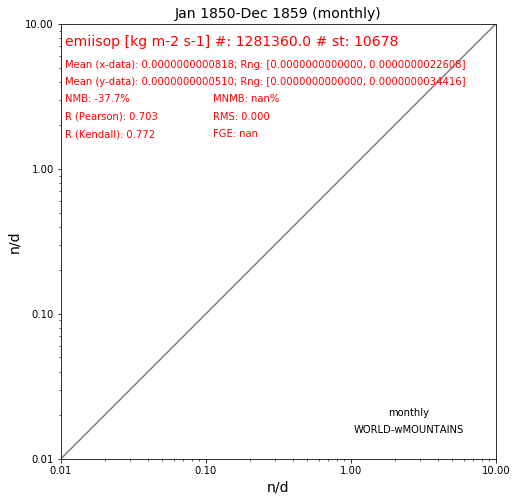

In [41]:
coldata.plot_scatter(marker='o', color='blue', alpha=0.1);